<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [9]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [10]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [11]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [12]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [13]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [14]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [15]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [16]:
# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Verify the output
print(type(Y))
print(Y[:5])

<class 'numpy.ndarray'>
[0 0 0 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [15]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [16]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [17]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [19]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [20]:
# Import necessary libraries for logistic regression and grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Create a logistic regression object
lr = LogisticRegression()

# Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and the accuracy on the validation data
print("Tuned hyperparameters: (best parameters) ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)


/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Tuned hyperparameters: (best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8196428571428571


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
print("Accuracy: ", logreg_cv.best_score_)


Accuracy:  0.8196428571428571


Lets look at the confusion matrix:


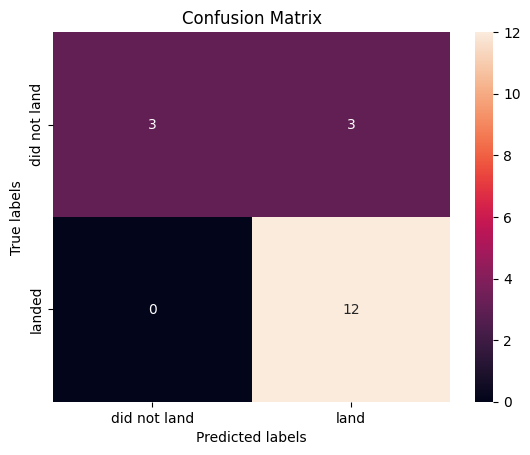

In [22]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for SVM
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Display the best parameters and the accuracy on the validation data
print("Tuned hyperparameters: (best parameters) ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)

# Calculate the accuracy on the test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy: ", svm_test_accuracy)

Tuned hyperparameters: (best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy:  0.8482142857142856
Test Accuracy:  0.8333333333333334


In [25]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [26]:
# Calculate the accuracy on the test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy: ", svm_test_accuracy)

Test Accuracy:  0.8333333333333334


We can plot the confusion matrix


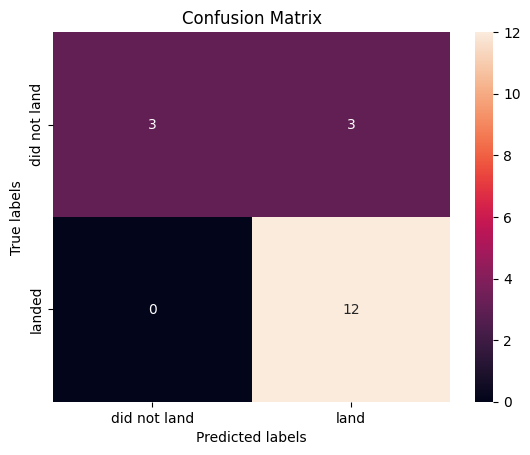

In [33]:
# If you are using a Jupyter notebook, uncomment and run the following line to install seaborn
# Predict on the test data
Y_pred = svm_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy:  0.875
Test Accuracy:  0.8333333333333334


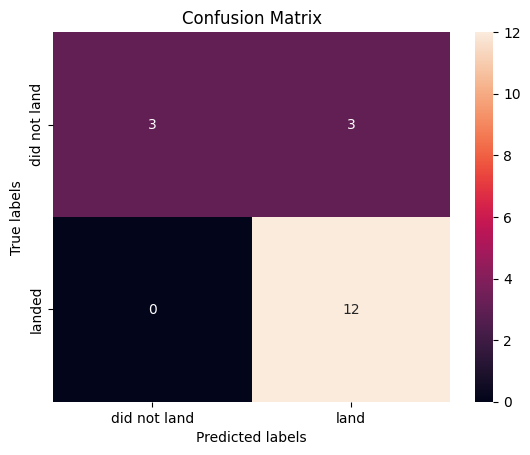

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for Decision Tree
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Display the best parameters and the accuracy on the validation data
print("Tuned hyperparameters: (best parameters) ", tree_cv.best_params_)
print("Accuracy: ", tree_cv.best_score_)

# Calculate the accuracy on the test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy: ", tree_test_accuracy)

# Predict on the test data
Y_pred = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)


In [35]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy:  0.8767857142857143
Test Accuracy:  0.6666666666666666


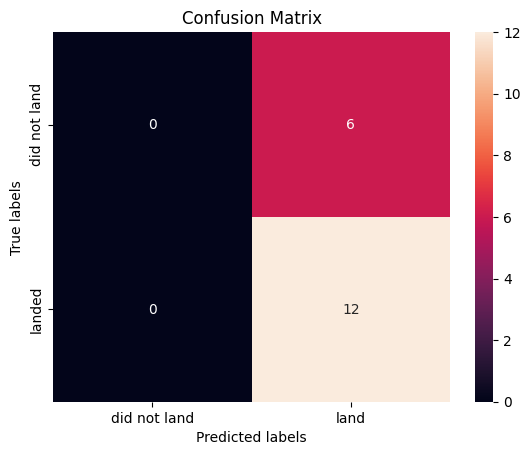

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for Decision Tree
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create a Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Display the best parameters and the accuracy on the validation data
print("Tuned hyperparameters: (best parameters) ", tree_cv.best_params_)
print("Accuracy: ", tree_cv.best_score_)

# Calculate the accuracy on the test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy: ", tree_test_accuracy)

# Predict on the test data
Y_pred = tree_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)


We can plot the confusion matrix


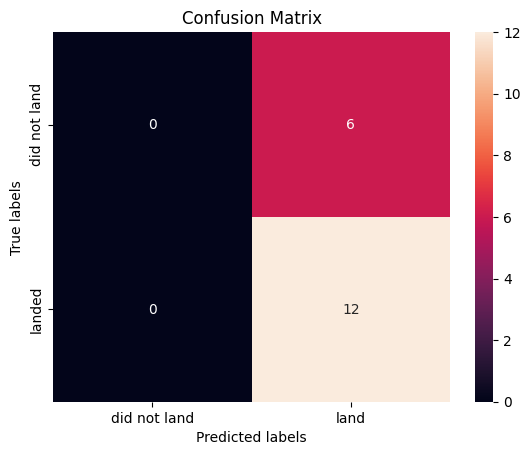

In [37]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Tuned hyperparameters: (best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy:  0.8482142857142858
Test Accuracy:  0.8333333333333334


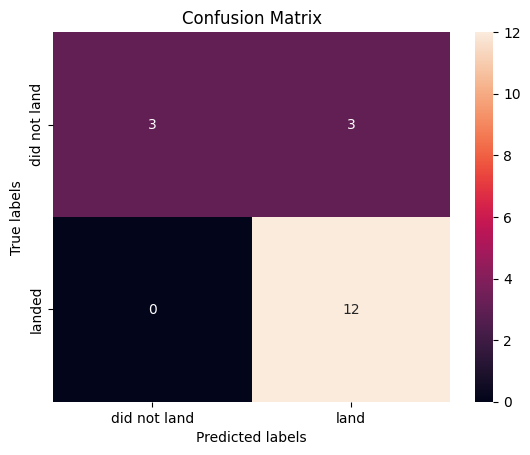

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Display the best parameters and the accuracy on the validation data
print("Tuned hyperparameters: (best parameters) ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)

# Calculate the accuracy on the test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy: ", knn_test_accuracy)

# Predict on the test data
Y_pred = knn_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)


In [39]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Tuned hyperparameters: (best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy:  0.8482142857142858
Test Accuracy:  0.8333333333333334


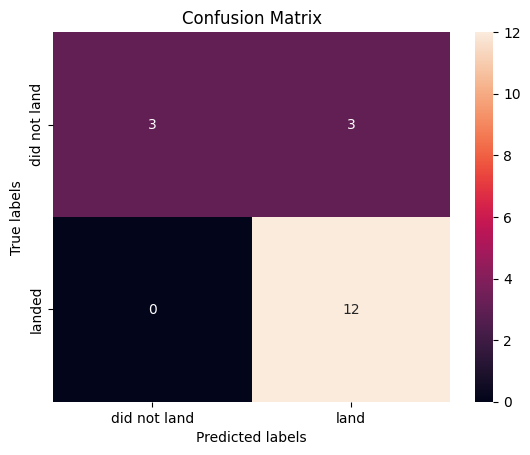

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create a KNN object
KNN = KNeighborsClassifier()

# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Display the best parameters and the accuracy on the validation data
print("Tuned hyperparameters: (best parameters) ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)

# Calculate the accuracy on the test data
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy: ", knn_test_accuracy)

# Predict on the test data
Y_pred = knn_cv.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)


We can plot the confusion matrix


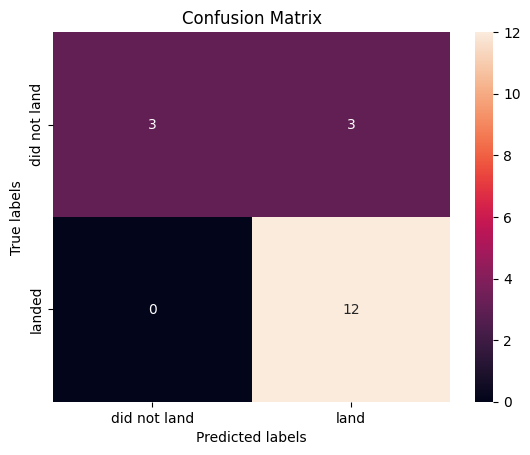

In [41]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters_lr, cv=10)
lr_cv.fit(X_train, Y_train)
lr_test_accuracy = lr_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy: ", lr_test_accuracy)

# Support Vector Machine
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy: ", svm_test_accuracy)

# Decision Tree
parameters_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1, 10)], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy: ", tree_test_accuracy)

# K-Nearest Neighbors
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy: ", knn_test_accuracy)

# Compare the accuracies
accuracies = {
    'Logistic Regression': lr_test_accuracy,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

# Print the method with the highest accuracy
best_method = max(accuracies, key=accuracies.get)
print(f"The best method is {best_method} with an accuracy of {accuracies[best_method]:.4f}")


Logistic Regression Test Accuracy:  0.8333333333333334
SVM Test Accuracy:  0.8333333333333334


/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Decision Tree Test Accuracy:  0.8333333333333334
KNN Test Accuracy:  0.8333333333333334
The best method is Logistic Regression with an accuracy of 0.8333


In [43]:
# Print the number of records in the test sample
print(f"Number of records in the test sample: {len(X_test)}")

Number of records in the test sample: 18


Logistic Regression Test Accuracy:  0.8333333333333334
SVM Test Accuracy:  0.8333333333333334
Decision Tree Test Accuracy:  0.8333333333333334


/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


KNN Test Accuracy:  0.8333333333333334


<ipython-input-18-ab16833cd46d>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=accuracy_values, palette="viridis")


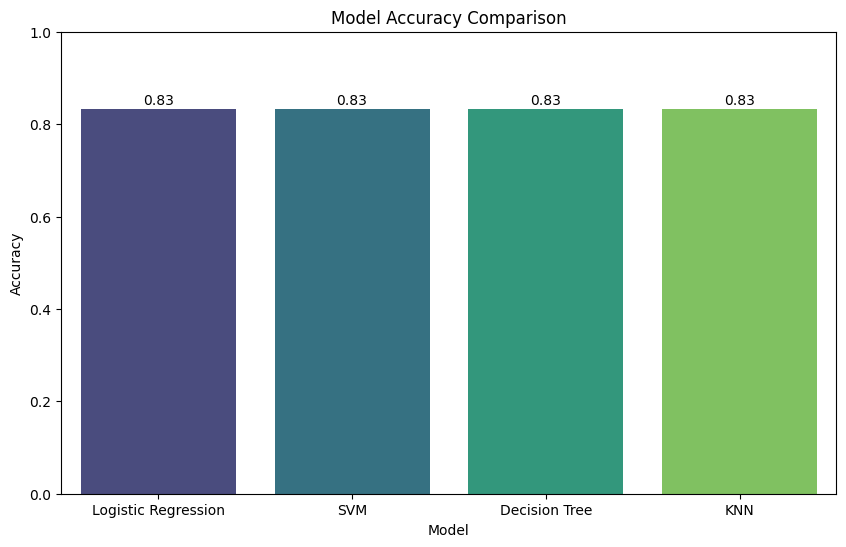

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Assuming dataframes are already loaded
# data = pd.read_csv(text1)
# X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters_lr, cv=10)
lr_cv.fit(X_train, Y_train)
lr_test_accuracy = lr_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy: ", lr_test_accuracy)

# Support Vector Machine
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy: ", svm_test_accuracy)

# Decision Tree
parameters_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1, 10)], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy: ", tree_test_accuracy)

# K-Nearest Neighbors
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy: ", knn_test_accuracy)

# Compare the accuracies
accuracies = {
    'Logistic Regression': lr_test_accuracy,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

# Visualize the model accuracy for all built classification models
methods = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=accuracy_values, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i in range(len(methods)):
    plt.text(i, accuracy_values[i] + 0.01, f'{accuracy_values[i]:.2f}', ha='center')
plt.show()


Logistic Regression Test Accuracy:  0.8333333333333334
SVM Test Accuracy:  0.8333333333333334
Decision Tree Test Accuracy:  0.8333333333333334
KNN Test Accuracy:  0.8333333333333334


<ipython-input-19-ba4daa1d0954>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=accuracy_values, palette="viridis")


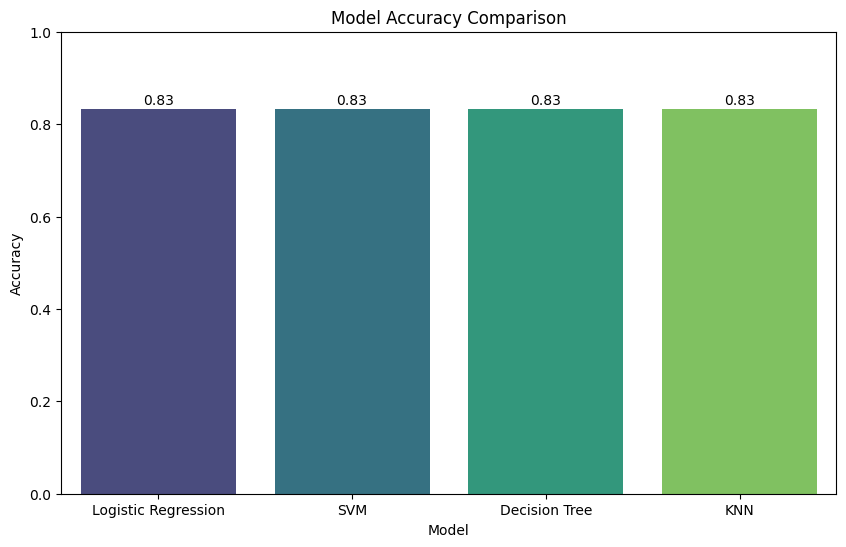

The best method is Logistic Regression with an accuracy of 0.8333


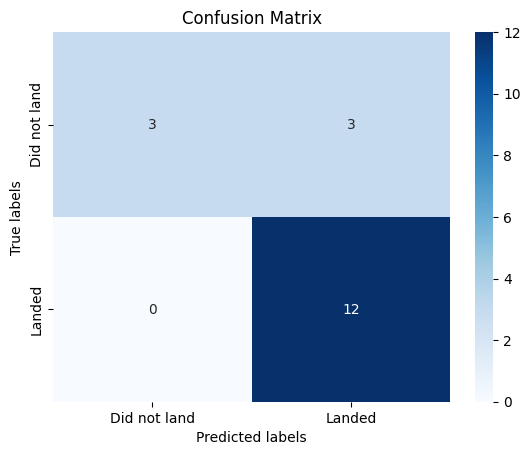

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did not land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did not land', 'Landed'])
    plt.show()

# Assuming dataframes are already loaded
# data = pd.read_csv(text1)
# X = pd.read_csv(text2)

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters_lr, cv=10)
lr_cv.fit(X_train, Y_train)
lr_test_accuracy = lr_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy: ", lr_test_accuracy)

# Support Vector Machine
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy: ", svm_test_accuracy)

# Decision Tree
parameters_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1, 10)], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy: ", tree_test_accuracy)

# K-Nearest Neighbors
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy: ", knn_test_accuracy)

# Compare the accuracies
accuracies = {
    'Logistic Regression': lr_test_accuracy,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

# Visualize the model accuracy for all built classification models
methods = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=accuracy_values, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i in range(len(methods)):
    plt.text(i, accuracy_values[i] + 0.01, f'{accuracy_values[i]:.2f}', ha='center')
plt.show()

# Identify the best model
best_method = max(accuracies, key=accuracies.get)
print(f"The best method is {best_method} with an accuracy of {accuracies[best_method]:.4f}")

# Predict on the test data using the best model
if best_method == 'Logistic Regression':
    best_model = lr_cv
elif best_method == 'SVM':
    best_model = svm_cv
elif best_method == 'Decision Tree':
    best_model = tree_cv
elif best_method == 'KNN':
    best_model = knn_cv

Y_pred = best_model.predict(X_test)

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)


In [26]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current working directory:", current_directory)

Current working directory: /drive/module_4


In [28]:
import pandas as pd

# Load the datasets
data = pd.read_csv("/drive/module_4/dataset_part_2.csv")
X = pd.read_csv("/drive/module_4/dataset_part_3.csv")

# Display the first few rows of each dataset
print(data.head())
print(X.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

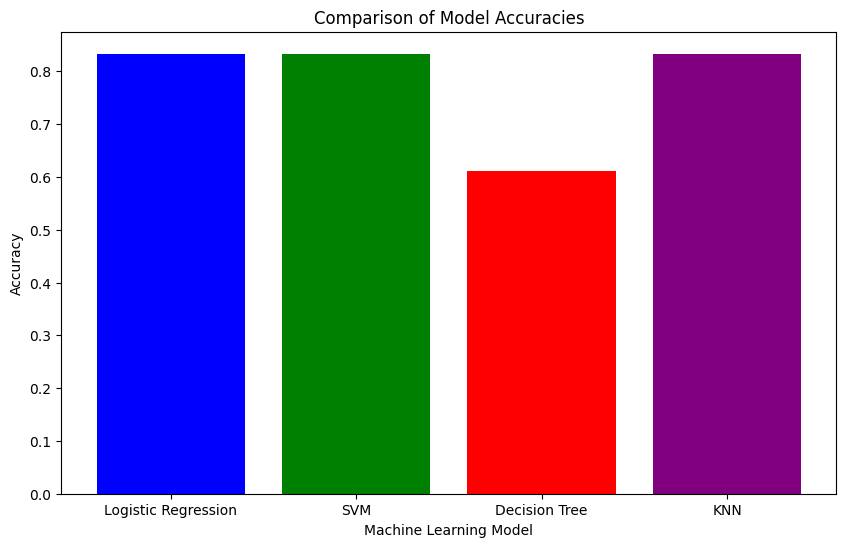

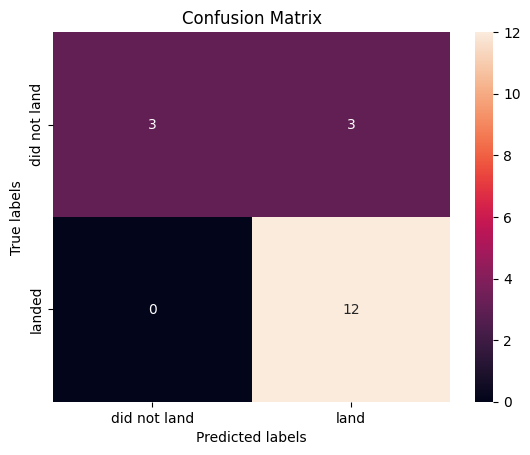

In [29]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

# Load the datasets
data = pd.read_csv("/drive/module_4/dataset_part_2.csv")
X = pd.read_csv("/drive/module_4/dataset_part_3.csv")

# Verify the data
print(data.head())
print(X.head())

# Create a NumPy array from the Class column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Logistic Regression
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters_lr, cv=10)
lr_cv.fit(X_train, Y_train)
lr_test_accuracy = lr_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy: ", lr_test_accuracy)

# Support Vector Machine
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy: ", svm_test_accuracy)

# Decision Tree
parameters_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1, 10)], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy: ", tree_test_accuracy)

# K-Nearest Neighbors
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy: ", knn_test_accuracy)

# Compare the accuracies
accuracies = {
    'Logistic Regression': lr_test_accuracy,
    'SVM': svm_test_accuracy,
    'Decision Tree': tree_test_accuracy,
    'KNN': knn_test_accuracy
}

# Print the method with the highest accuracy
best_method = max(accuracies, key=accuracies.get)
print(f"The best method is {best_method} with an accuracy of {accuracies[best_method]:.4f}")

# Visualize the accuracies in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

# Show the confusion matrix for the best model
if best_method == 'Logistic Regression':
    best_model = lr_cv
elif best_method == 'SVM':
    best_model = svm_cv
elif best_method == 'Decision Tree':
    best_model = tree_cv
else:
    best_model = knn_cv

yhat = best_model.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

# Logistic Regression
yhat_lr = lr_cv.predict(X_test)
precision_lr = precision_score(Y_test, yhat_lr)
recall_lr = recall_score(Y_test, yhat_lr)
f1_lr = f1_score(Y_test, yhat_lr)
roc_auc_lr = roc_auc_score(Y_test, lr_cv.predict_proba(X_test)[:, 1])
log_loss_lr = log_loss(Y_test, lr_cv.predict_proba(X_test))

# SVM
yhat_svm = svm_cv.predict(X_test)
precision_svm = precision_score(Y_test, yhat_svm)
recall_svm = recall_score(Y_test, yhat_svm)
f1_svm = f1_score(Y_test, yhat_svm)
# For ROC-AUC and log loss, we need probability estimates, but SVM with a linear kernel doesn't support this directly
# We will use decision function scores as a proxy
roc_auc_svm = roc_auc_score(Y_test, svm_cv.decision_function(X_test))
# log_loss_svm = log_loss(Y_test, svm_cv.predict_proba(X_test))  # Uncomment if using a kernel that supports predict_proba

# Decision Tree
yhat_tree = tree_cv.predict(X_test)
precision_tree = precision_score(Y_test, yhat_tree)
recall_tree = recall_score(Y_test, yhat_tree)
f1_tree = f1_score(Y_test, yhat_tree)
roc_auc_tree = roc_auc_score(Y_test, tree_cv.predict_proba(X_test)[:, 1])
log_loss_tree = log_loss(Y_test, tree_cv.predict_proba(X_test))

# K-Nearest Neighbors
yhat_knn = knn_cv.predict(X_test)
precision_knn = precision_score(Y_test, yhat_knn)
recall_knn = recall_score(Y_test, yhat_knn)
f1_knn = f1_score(Y_test, yhat_knn)
roc_auc_knn = roc_auc_score(Y_test, knn_cv.predict_proba(X_test)[:, 1])
log_loss_knn = log_loss(Y_test, knn_cv.predict_proba(X_test))

# Print the results
print("Logistic Regression:")
print(f"Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1 Score: {f1_lr:.4f}, ROC-AUC: {roc_auc_lr:.4f}, Log Loss: {log_loss_lr:.4f}")

print("\nSVM:")
print(f"Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1 Score: {f1_svm:.4f}, ROC-AUC: {roc_auc_svm:.4f}")

print("\nDecision Tree:")
print(f"Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}, F1 Score: {f1_tree:.4f}, ROC-AUC: {roc_auc_tree:.4f}, Log Loss: {log_loss_tree:.4f}")

print("\nK-Nearest Neighbors:")
print(f"Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1 Score: {f1_knn:.4f}, ROC-AUC: {roc_auc_knn:.4f}, Log Loss: {log_loss_knn:.4f}")


Logistic Regression:
Precision: 0.8000, Recall: 1.0000, F1 Score: 0.8889, ROC-AUC: 0.8889, Log Loss: 0.4787

SVM:
Precision: 0.8000, Recall: 1.0000, F1 Score: 0.8889, ROC-AUC: 0.9583

Decision Tree:
Precision: 0.7273, Recall: 0.6667, F1 Score: 0.6957, ROC-AUC: 0.6389, Log Loss: 4.3677

K-Nearest Neighbors:
Precision: 0.8000, Recall: 1.0000, F1 Score: 0.8889, ROC-AUC: 0.8958, Log Loss: 0.3662


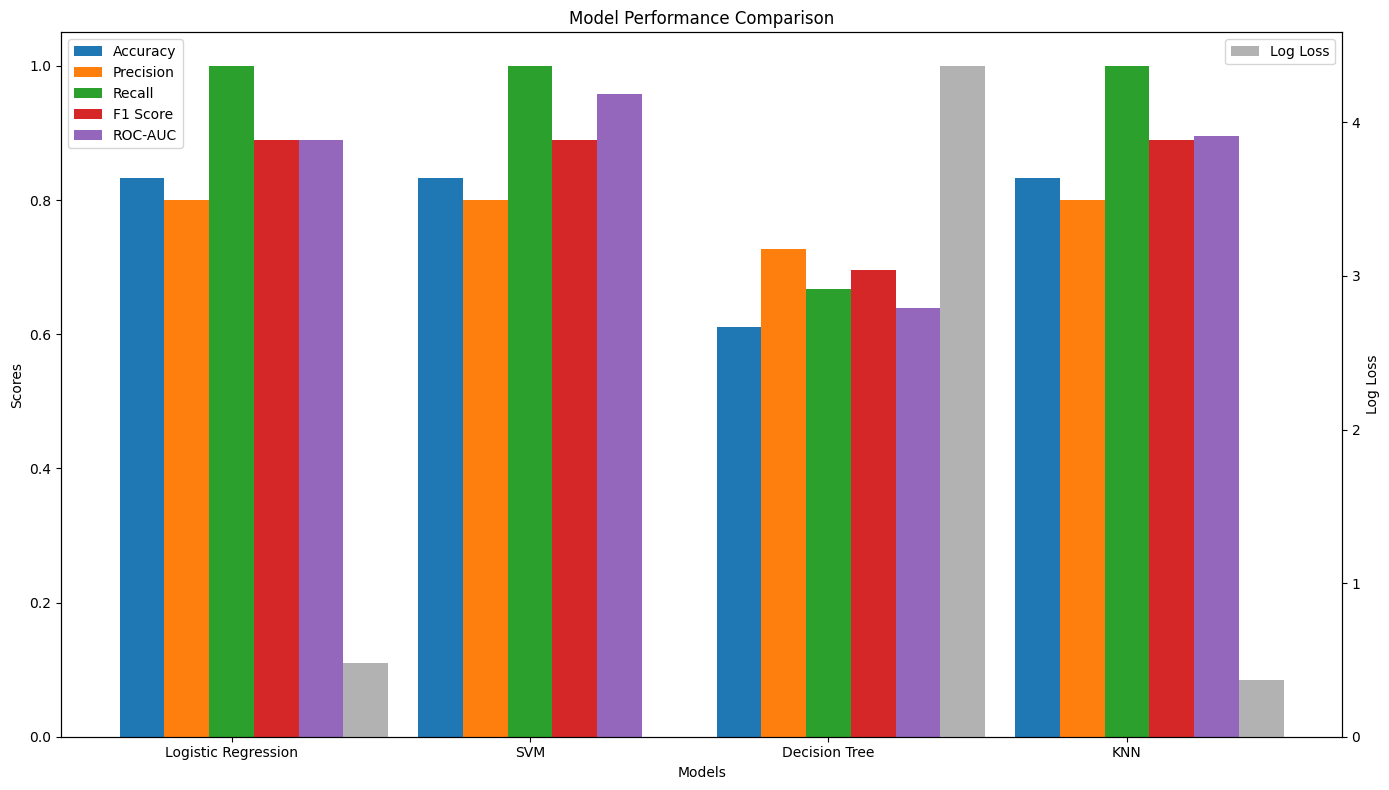

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [0.8333, 0.8333, 0.6111, 0.8333]
precision = [0.8000, 0.8000, 0.7273, 0.8000]
recall = [1.0000, 1.0000, 0.6667, 1.0000]
f1_score = [0.8889, 0.8889, 0.6957, 0.8889]
roc_auc = [0.8889, 0.9583, 0.6389, 0.8958]
log_loss = [0.4787, np.nan, 4.3677, 0.3662]

# Plotting bar charts
x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - 2*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1 Score')
rects5 = ax.bar(x + 2*width, roc_auc, width, label='ROC-AUC')
# For log_loss we need a secondary y-axis due to different scale
ax2 = ax.twinx()
rects6 = ax2.bar(x + 3*width, log_loss, width, label='Log Loss', color='gray', alpha=0.6)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax2.set_ylabel('Log Loss')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


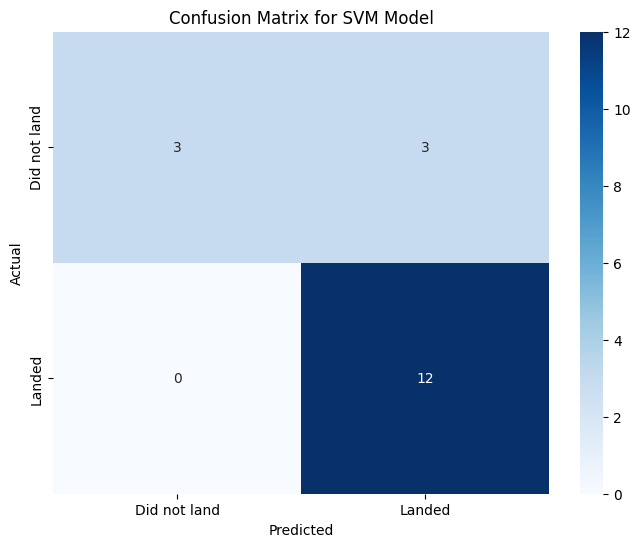

In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
data = pd.read_csv("/drive/module_4/dataset_part_2.csv")
X = pd.read_csv("/drive/module_4/dataset_part_3.csv")

# Create target variable Y from 'Class' column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for SVM
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(X_train, Y_train)

# Calculate the accuracy on the test data
svm_test_accuracy = svm_cv.score(X_test, Y_test)

# Predict on the test data
Y_pred = svm_cv.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not land', 'Landed'], yticklabels=['Did not land', 'Landed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model')
plt.show()


Logistic Regression Validation Accuracy: 0.8464
SVM Validation Accuracy: 0.8482
Decision Tree Validation Accuracy: 0.8750
KNN Validation Accuracy: 0.8482
The best model based on validation accuracy is Decision Tree with an accuracy of 0.8750


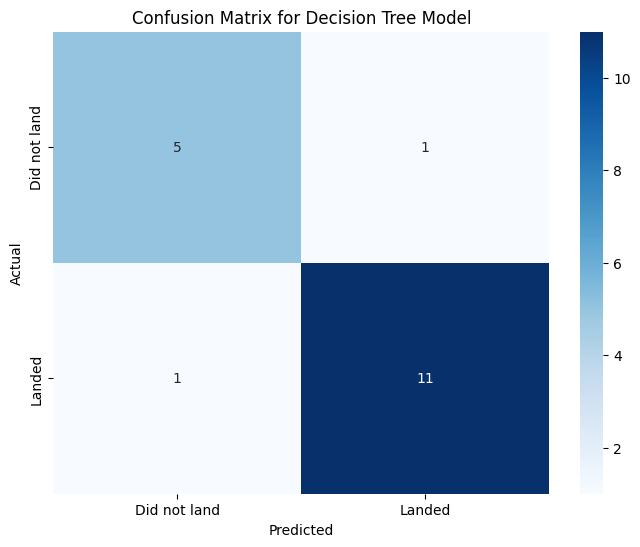

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/drive/module_4/dataset_part_2.csv")
X = pd.read_csv("/drive/module_4/dataset_part_3.csv")

# Create target variable Y from 'Class' column
Y = data['Class'].to_numpy()

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid for each model
parameters_lr = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
parameters_svm = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma': np.logspace(-3, 3, 5)}
parameters_tree = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1, 10)], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2]}

# Create model objects
lr = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Create GridSearchCV objects
lr_cv = GridSearchCV(lr, parameters_lr, cv=10)
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)

# Fit the models
lr_cv.fit(X_train, Y_train)
svm_cv.fit(X_train, Y_train)
tree_cv.fit(X_train, Y_train)
knn_cv.fit(X_train, Y_train)

# Calculate the test accuracy for each model
lr_test_accuracy = lr_cv.score(X_test, Y_test)
svm_test_accuracy = svm_cv.score(X_test, Y_test)
tree_test_accuracy = tree_cv.score(X_test, Y_test)
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Get the best validation accuracies
lr_val_accuracy = lr_cv.best_score_
svm_val_accuracy = svm_cv.best_score_
tree_val_accuracy = tree_cv.best_score_
knn_val_accuracy = knn_cv.best_score_

# Print the best validation accuracies
print(f"Logistic Regression Validation Accuracy: {lr_val_accuracy:.4f}")
print(f"SVM Validation Accuracy: {svm_val_accuracy:.4f}")
print(f"Decision Tree Validation Accuracy: {tree_val_accuracy:.4f}")
print(f"KNN Validation Accuracy: {knn_val_accuracy:.4f}")

# Determine the best model based on validation accuracy
best_val_accuracy = max(lr_val_accuracy, svm_val_accuracy, tree_val_accuracy, knn_val_accuracy)
best_model_name = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'][[lr_val_accuracy, svm_val_accuracy, tree_val_accuracy, knn_val_accuracy].index(best_val_accuracy)]
print(f"The best model based on validation accuracy is {best_model_name} with an accuracy of {best_val_accuracy:.4f}")

# If the best model is SVM, calculate and plot the confusion matrix for it
if best_model_name == 'SVM':
    best_model = svm_cv
elif best_model_name == 'Logistic Regression':
    best_model = lr_cv
elif best_model_name == 'Decision Tree':
    best_model = tree_cv
else:
    best_model = knn_cv

# Predict on the test data with the best model
Y_pred = best_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not land', 'Landed'], yticklabels=['Did not land', 'Landed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_name} Model')
plt.show()

# Print the classification report
print(classification_report(Y_test, Y_pred))


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
